In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<Axes: >

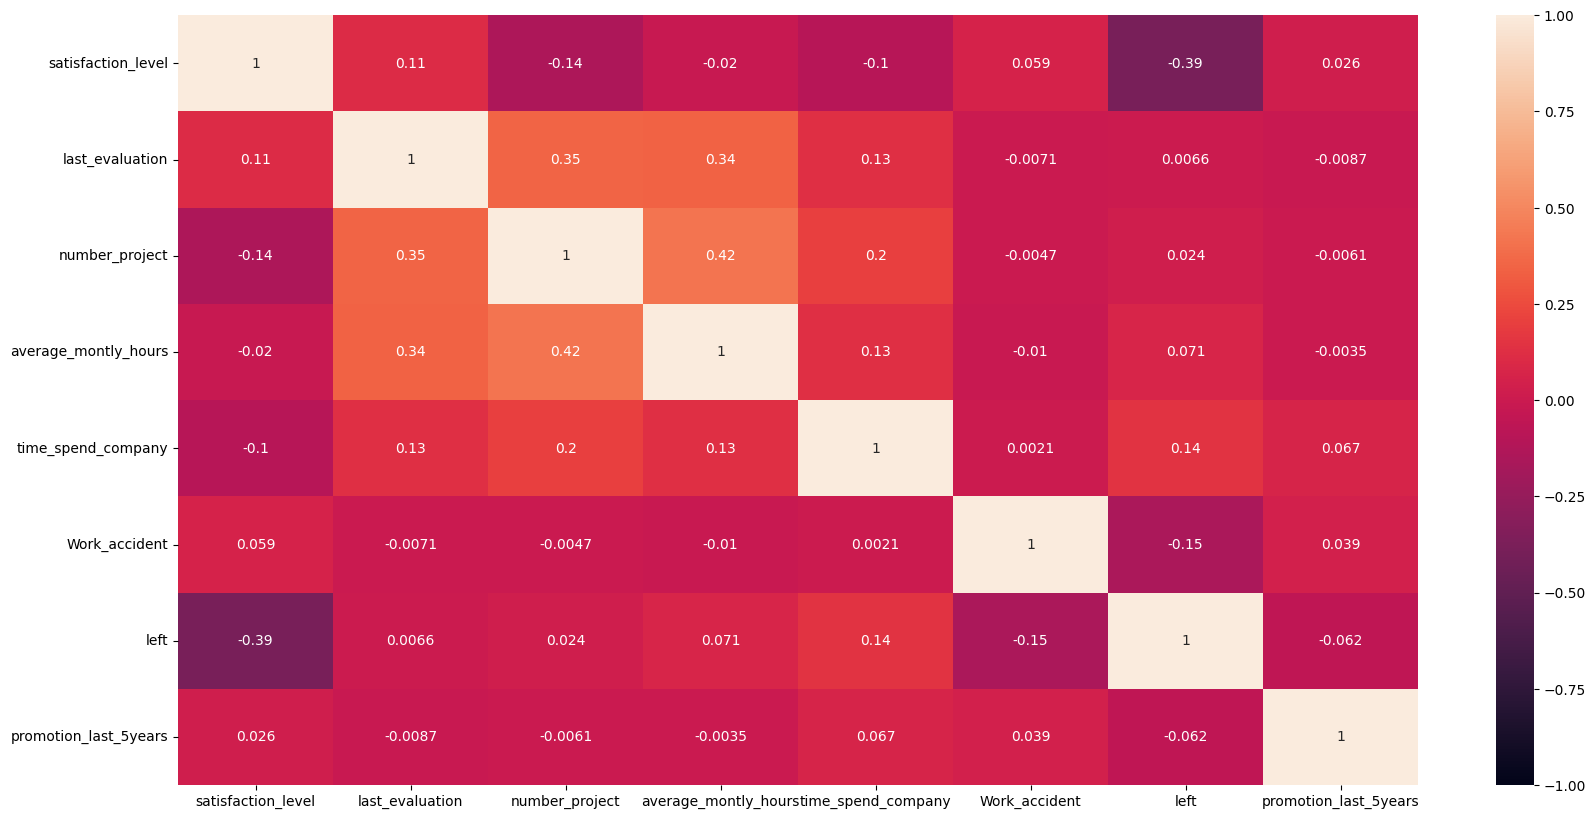

In [5]:
import seaborn as sns 
corr = df.corr(numeric_only=True) 
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True,)

In [13]:
left = df[df.left == 1]
left.shape 

(3571, 10)

In [14]:
retained = df[df.left == 0]
retained.shape 

(11428, 10)

In [16]:
#average number of all columns 
df.groupby('left').mean(numeric_only=True)  

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

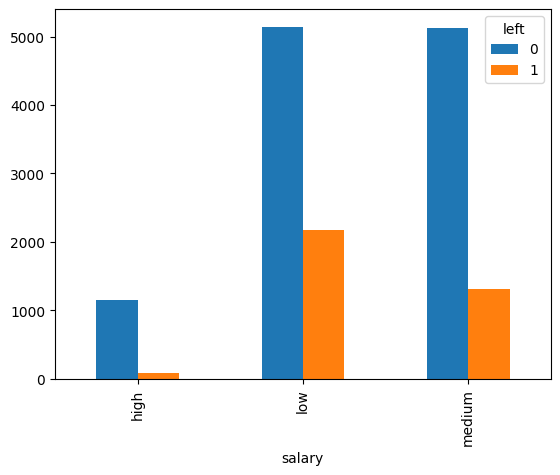

In [17]:
pd.crosstab(df.salary, df.left).plot(kind='bar') 

<Axes: xlabel='Department'>

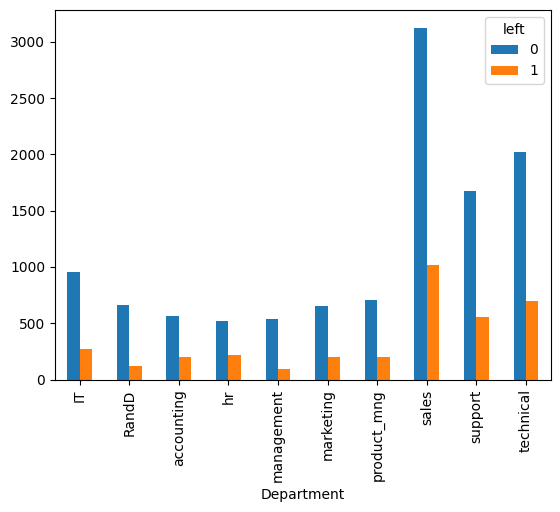

In [18]:
pd.crosstab(df.Department, df.left).plot(kind='bar') 

In [19]:
# satisfaction level, average_montly_hours, Work_accident, promotion_last_5years, salary

In [20]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'salary']]
subdf.head() 

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary
0,0.38,157,0,0,low
1,0.80,262,0,0,medium
2,0.11,272,0,0,medium
3,0.72,223,0,0,low
4,0.37,159,0,0,low


In [44]:
subdf.average_montly_hours.describe()  

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [22]:
salary_dummies = pd.get_dummies(subdf.salary, prefix='salary', dtype=int)
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [35]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis='columns')
df_with_dummies

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,0,low,0,1,0
1,0.80,262,0,0,medium,0,0,1
2,0.11,272,0,0,medium,0,0,1
3,0.72,223,0,0,low,0,1,0
4,0.37,159,0,0,low,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,0,low,0,1,0
14995,0.37,160,0,0,low,0,1,0
14996,0.37,143,0,0,low,0,1,0
14997,0.11,280,0,0,low,0,1,0


In [36]:
df_with_dummies.drop('salary', axis='columns', inplace=True) 
df_with_dummies 

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,0,1,0
1,0.80,262,0,0,0,0,1
2,0.11,272,0,0,0,0,1
3,0.72,223,0,0,0,1,0
4,0.37,159,0,0,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,0,0,1,0
14995,0.37,160,0,0,0,1,0
14996,0.37,143,0,0,0,1,0
14997,0.11,280,0,0,0,1,0


In [37]:
X = df_with_dummies 
X.head() 

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,0,1,0
1,0.80,262,0,0,0,0,1
2,0.11,272,0,0,0,0,1
3,0.72,223,0,0,0,1,0
4,0.37,159,0,0,0,1,0


In [38]:
y = df.left
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression() 
model.fit(X_train, y_train)


C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
model.predict(X_test) 

array([0, 0, 1, ..., 0, 0, 0], shape=(3000,))

In [42]:
model.score(X_test, y_test) 

0.7746666666666666